In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
# Uncomment the next line for use in a Jupyter notebook
%matplotlib inline

In [76]:
# Read in the image
# There are six more images available for reading
# called sample1-6.jpg, feel free to experiment with the others!
image_name = 'f-tharangini_2017_07_14_02_DJI_0003.MP4-076.jpg'
image_name = '/media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/sowparnika_thecolumn_2017_08_11/Images/thecolumn_2017-08-11_01_DJI_0121.JPG'
#image_name = '/media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/2017_09_04/Images/DJI_0433.JPG'
image = mpimg.imread(image_name)

In [77]:
def plotImageLarge(img, cmap=None):
    fig, ax = plt.subplots(figsize=(21, 9))
    if cmap:
        ax.imshow(img, cmap=cmap)
    else:
        ax.imshow(img)    

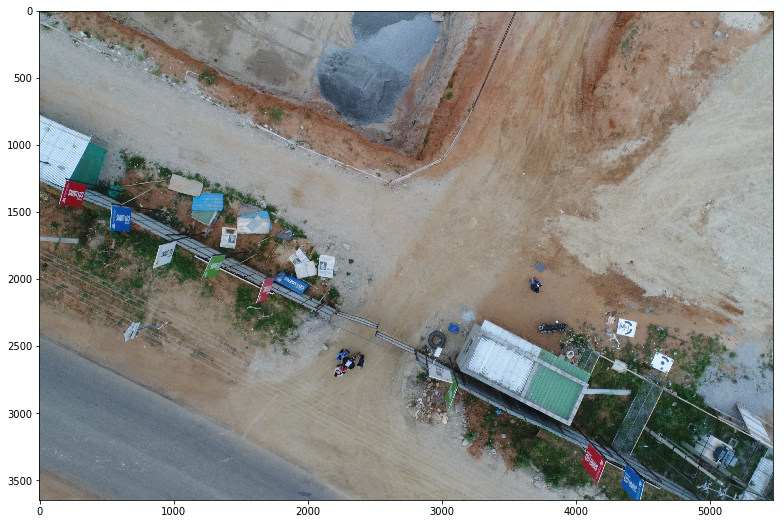

In [78]:
plotImageLarge(image)

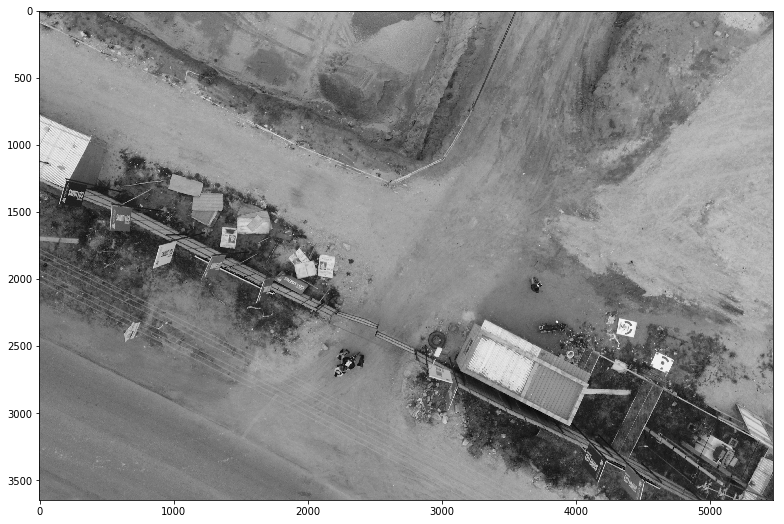

In [79]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plotImageLarge(gray_image, cmap='gray')

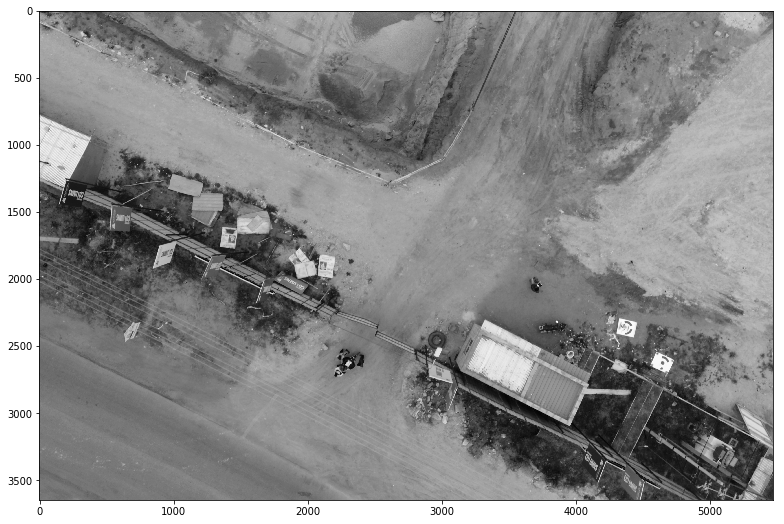

In [80]:
gray_image_blur = cv2.medianBlur(gray_image,5)
plotImageLarge(gray_image_blur, cmap='gray')

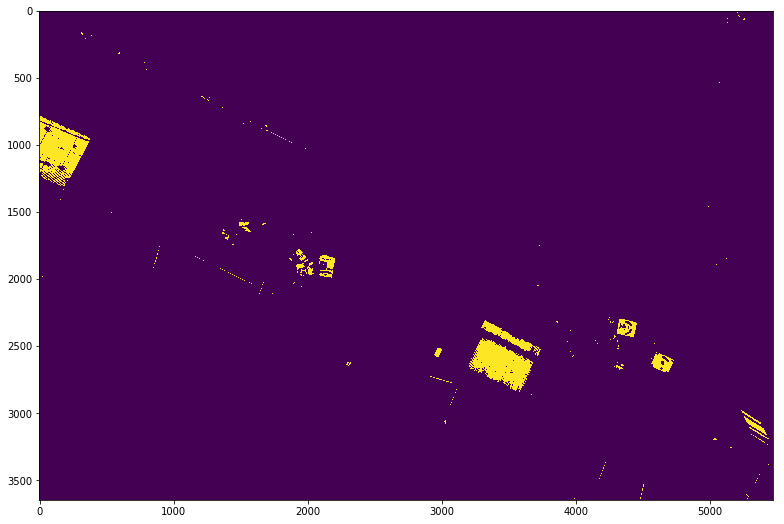

In [81]:
#https://docs.opencv.org/3.3.1/d7/d4d/tutorial_py_thresholding.html
ret,th1 = cv2.threshold(gray_image_blur,200,255,cv2.THRESH_BINARY)
plotImageLarge(th1)

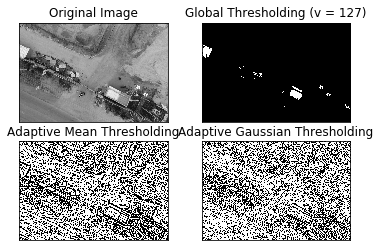

In [82]:
th2 = cv2.adaptiveThreshold(gray_image_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,101,2)
th3 = cv2.adaptiveThreshold(gray_image_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,101,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [gray_image_blur, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


In [83]:
# contour_image, contours, hierarchy = cv2.findContours(th1, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# cnt = contours[4]
# th1 = cv2.drawContours(th1, [cnt], 0, (0,255,0), 3)

# plotImageLarge(contour_image, cmap='gray')

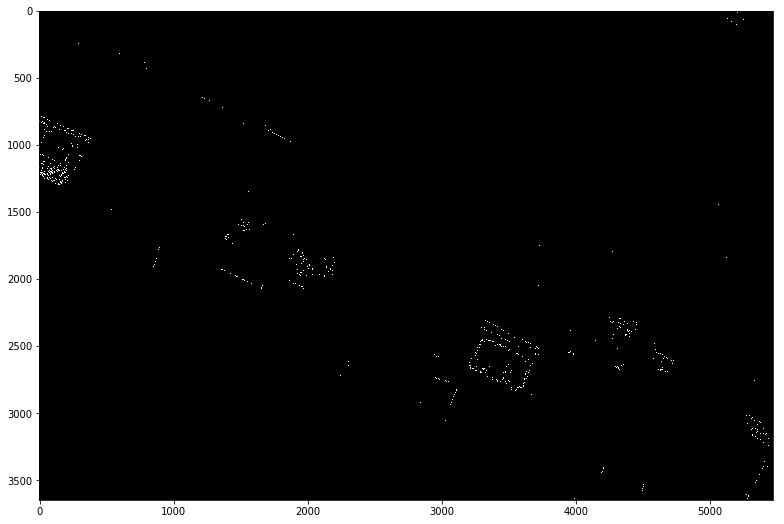

In [84]:
fw_canny_edge = cv2.Canny(th1, 50, 100)
plotImageLarge(fw_canny_edge, cmap='gray')

(4648.74462890625, 2627.278564453125)


True

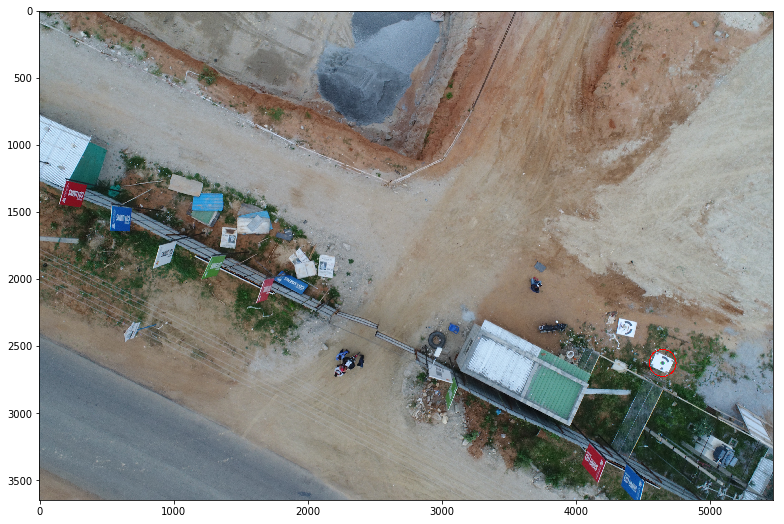

In [97]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 200
params.maxThreshold = 255


# Filter by Area.
params.filterByArea = True
params.minArea = 150

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.9

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87

# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(image)
for kp in keypoints:
    print(kp.pt)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

im_with_keypoints = cv2.drawKeypoints(image, keypoints, np.array([]), (0,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
for kp in keypoints:
    cv2.circle(im_with_keypoints, (round(kp.pt[0]), round(kp.pt[1])), 100, (255, 0, 0), 5)
    cv2.circle(im_with_keypoints, (round(kp.pt[0]), round(kp.pt[1])), 2, (255, 255, 0), 1)

# Show blobs
plotImageLarge(im_with_keypoints)
cv2.imwrite('detected_marker.png',im_with_keypoints)